# PCA

In [1]:
import numpy as np

def PCA(X , num_components):
    # Step 1: mean Centering the data.
    X_meaned = X - np.mean(X , axis = 0)
    print(f"\nStep 1: mean Centering the data:")
    print(f"X_meaned = X - np.mean(X) = \n{X} - {np.mean(X , axis = 0)} = \n{X_meaned}")

    # Step 2: calculating the covariance matrix of the mean-centered data.
    cov_mat = np.cov(X_meaned , rowvar = False)
    print(f"\nStep 2: calculating the covariance matrix of the mean-centered data.")
    print(f"cov_mat = np.cov(X_meaned , rowvar = False) = \n{cov_mat}")

    # Step 3: Calculating Eigenvalues and Eigenvectors of the covariance matrix.
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    print(f"\nStep 3: Calculating Eigenvalues and Eigenvectors of the covariance matrix.")
    print(f"eigen_values , eigen_vectors = np.linalg.eigh(cov_mat) = \n{eigen_values}, \n{eigen_vectors}")

    # Step 4: sort the eigenvalues and eigenvectors in descending order.
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    print(f"\nStep 4: sort the eigenvalues and eigenvectors in descending order.")
    print(f"sorted_eigenvalues = {sorted_eigenvalues}")
    print(f"sorted_eigenvectors = \n{sorted_eigenvectors}")
    
    # Step 5: select the first num_components eigenvectors, num_components is desired dimension
    # of our final reduced data.
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    print(f"\nStep 5: select the first num_components eigenvectors, num_components is desired dimension of our final reduced data.")
    print(f"eigenvector_subset = \n{eigenvector_subset}")

    # Step 6: Transform the data.
    X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
    print(f"\nStep 6: Transform the data.")
    print(f"X_reduced = (eigenvector_subset^T (dot) X_meaned^T)^T = \n{X_reduced}\n")

    return X_reduced


In [2]:
import pandas as pd
 
#Generate a dataset.
X = np.array([[8,2,1],[1,5,8],[5,6,1],[4,6,2],[0,4,2],[9,9,1],[4,3,6],[4,9,0]])
X_df = pd.DataFrame(X , columns = ['x','y','z'])
print(f"Raw data:")
print(X_df)
 
#Applying it to PCA function
mat_reduced = PCA(X , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
print("PCA data:")
print(principal_df)

Raw data:
   x  y  z
0  8  2  1
1  1  5  8
2  5  6  1
3  4  6  2
4  0  4  2
5  9  9  1
6  4  3  6
7  4  9  0

Step 1: mean Centering the data:
X_meaned = X - np.mean(X) = 
[[8 2 1]
 [1 5 8]
 [5 6 1]
 [4 6 2]
 [0 4 2]
 [9 9 1]
 [4 3 6]
 [4 9 0]] - [4.375 5.5   2.625] = 
[[ 3.625 -3.5   -1.625]
 [-3.375 -0.5    5.375]
 [ 0.625  0.5   -1.625]
 [-0.375  0.5   -0.625]
 [-4.375 -1.5   -0.625]
 [ 4.625  3.5   -1.625]
 [-0.375 -2.5    3.375]
 [-0.375  3.5   -2.625]]

Step 2: calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_meaned , rowvar = False) = 
[[ 9.41071429  1.64285714 -4.26785714]
 [ 1.64285714  6.57142857 -2.92857143]
 [-4.26785714 -2.92857143  7.98214286]]

Step 3: Calculating Eigenvalues and Eigenvectors of the covariance matrix.
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat) = 
[ 3.63659289  6.00405703 14.32363579], 
[[-0.40631127  0.61518928 -0.67561328]
 [-0.52135445 -0.76331156 -0.3815036 ]
 [-0.75040035  0.19722478  0.63087376]]

Step 4: s

<AxesSubplot:title={'center':'Projected Data'}, xlabel='PC1', ylabel='PC2'>

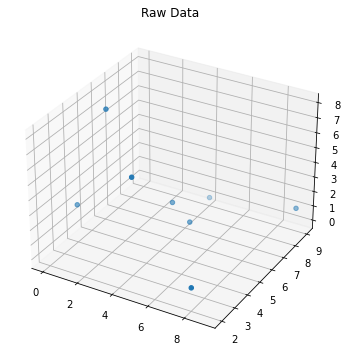

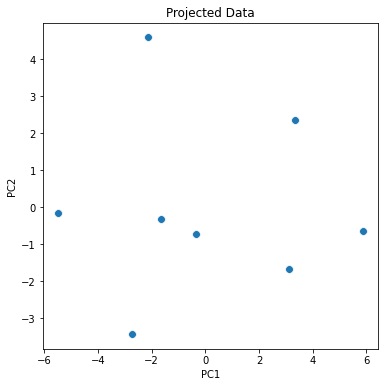

In [3]:
import seaborn as sb
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6,6))
ax = plt.axes(projection ="3d")
plt.title('Raw Data')
ax.scatter3D(X_df['x'].to_numpy(),X_df['y'].to_numpy(),X_df['z'].to_numpy())
 
plt.figure(figsize = (6,6))
plt.title('Projected Data')
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2'  , s = 60 , palette= 'icefire')
